In [7]:
% pylab inline
import IPython.display as ipd
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(12, 4))

# audio files download: https://drive.google.com/drive/folders/0By0bAi7hOBAFUHVXd1JCN3MwTEU
# text data (need to register): https://datahack.analyticsvidhya.com/contest/practice-problem-urban-sound-classification/

Populating the interactive namespace from numpy and matplotlib


In [8]:
ipd.Audio('train/Train/410.wav')

In [9]:
data, sampling_rate = librosa.load('train/Train/410.wav')
print data
print sampling_rate

[-0.00138432 -0.00405793 -0.00056969 ...,  0.00133469 -0.0032609
 -0.00550153]
22050


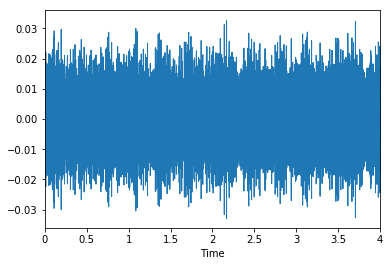

In [10]:
librosa.display.waveplot(data, sr=sampling_rate)

In [12]:
train = pd.read_csv('train/train.csv')
test = pd.read_csv('test/test.csv')

('Class: ', 'engine_idling')


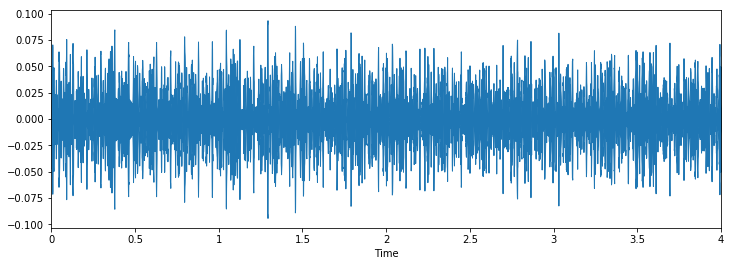

In [14]:
i = random.choice(train.index)

audio_name = train.ID[i]
path = os.path.join('train/Train', str(audio_name) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load(path)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

('Class: ', 'street_music')


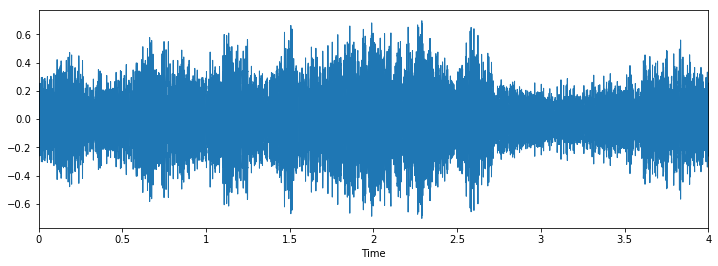

In [15]:
i = random.choice(train.index)

audio_name = train.ID[i]
path = os.path.join('train/Train', str(audio_name) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load(path)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

('Class: ', 'dog_bark')


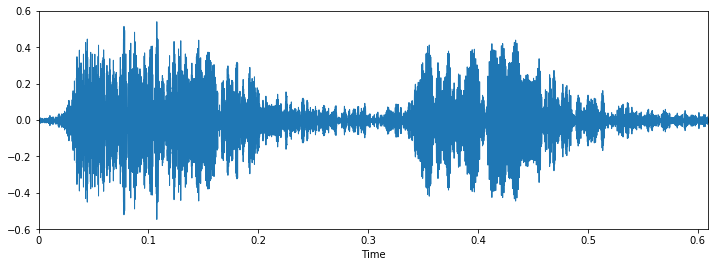

In [16]:
i = random.choice(train.index)

audio_name = train.ID[i]
path = os.path.join('train/Train', str(audio_name) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load(path)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

('Class: ', 'jackhammer')


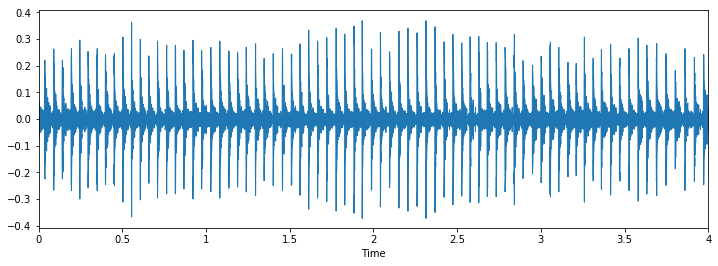

In [18]:
i = random.choice(train.index)

audio_name = train.ID[i]
path = os.path.join('train/Train', str(audio_name) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load(path)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [34]:
# extract features put them with label

def train_parser(row):
    # function to load files and extract features
    file_name = os.path.join('train/Train', str(row.ID) + '.wav')

    # handle exception to check if there isn't a file which is corrupted
    try:
      # kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # Extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
 
    feature = mfccs
    label = row.Class
 
    return [feature, label]

In [35]:
# This part takes longer time

temp = train.apply(train_parser, axis=1)
temp.columns = ['feature', 'label']

In [26]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical


seed = 410
rng = np.random.RandomState(seed)

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()

y = to_categorical(lb.fit_transform(y))

In [28]:
# Check input dimension
X.shape

(5435, 40)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from sklearn import metrics 


num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

# Only in first layer, need to specify shape; here means array of shape (*, 40)
# Here 256 means output array of shape (*, 256)
model.add(Dense(256, input_shape=(40,)))  
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# In last layer, output should be array of (*, num_labels)
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
model.fit(X, y, batch_size=128, epochs=5, validation_split = 0.3)

Train on 3804 samples, validate on 1631 samples
Epoch 1/5
3804/3804 [==============================] - 0s - loss: 12.6613 - acc: 0.1362 - val_loss: 11.8229 - val_acc: 0.2226
Epoch 2/5
3804/3804 [==============================] - 0s - loss: 11.4703 - acc: 0.1951 - val_loss: 7.9981 - val_acc: 0.3188
Epoch 3/5
3804/3804 [==============================] - 0s - loss: 10.1500 - acc: 0.2455 - val_loss: 6.3351 - val_acc: 0.3642
Epoch 4/5
3804/3804 [==============================] - 0s - loss: 8.4339 - acc: 0.2860 - val_loss: 3.7060 - val_acc: 0.4402
Epoch 5/5
3804/3804 [==============================] - 0s - loss: 5.9599 - acc: 0.3218 - val_loss: 2.2148 - val_acc: 0.4249


In [37]:
# evaluation

def test_parser(row):
    # function to load files and extract features
    file_name = os.path.join('test/Test', str(row.ID) + '.wav')

    # handle exception to check if there isn't a file which is corrupted
    try:
      # kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # Extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
 
    feature = mfccs
    label = row.Class
 
    return [feature, label]

In [ ]:
test_temp = test.apply(test_parser, axis=1)
test_temp.columns = ['feature', 'label']

In [ ]:
test_X = np.array(test_temp.feature.tolist())
test_y = np.array(test_temp.label.tolist())

lb = LabelEncoder()

test_y = to_categorical(lb.fit_transform(test_y))
pred = model.predict_classes(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

cm = confusion_matrix(test_y, pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN)/(TP+FP+FN+TN)  
precision = TP/(TP+FP)   
specificity= TN/(TN+FP)  
recall = TP/(TP+FN)   
auc_score = roc_auc_score(test_y, pred)

print "accuracy:", accuracy
print "precision:", precision
print "specificity:", specificity
print "recall:", recall